# Project 2 - Ames Housing Data and Kaggle Challenge

---

## Part 1: Data Processing and Exploratory Data Analysis

---

## Contents: 

- [Background](#background)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning - Numeric Features](#Data-Cleaning---Numeric-Features)
- [Data Cleaning - Categorical Features](#Data-Cleaning---Categorical-Features)
- [Data Cleaning - Test Dataset](#Data-Cleaning---Test-Dataset)
- [Export Clean Datasets](#Export-Clean-Datasets)




## Background

This project is a Kaggle challenge where participants will create a regression model based on the Ames Housing dataset and predict the final sales price of houses.

The analysis would be useful for prospective buyers searching for houses in Ames, Iowa, as well as homeowners and real estate companies putting their properties out for sale. The top 5 predictors that influences the sales price will be identified. 

The chosen model will be used to run the test dataset for prediction and uploaded to Kaggle for evaluation. 

## Exploratory Data Analysis

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


#### Read in datasets

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
#set to view all columns
pd.set_option('display.max_columns', 200)

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test.shape

(878, 80)

In [6]:
train.shape

(2051, 81)

In [7]:
test.shape

(878, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051.0,NaN,NaN,NaN,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,NaN,NaN,NaN,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721.0,NaN,NaN,NaN,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0
...,...,...,...,...,...,...,...,...,...,...,...
Misc Val,2051.0,NaN,NaN,NaN,51.574354,573.393985,0.0,0.0,0.0,0.0,17000.0
Mo Sold,2051.0,NaN,NaN,NaN,6.219893,2.744736,1.0,4.0,6.0,8.0,12.0
Yr Sold,2051.0,NaN,NaN,NaN,2007.775719,1.312014,2006.0,2007.0,2008.0,2009.0,2010.0
Sale Type,2051,9,WD,1781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing Values

In [10]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [11]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}).copy()
missing_value_df.sort_values('percent_missing', ascending=False).head(10)

,percent_missing
Pool QC,99.561190
Misc Feature,96.830814
Alley,93.174061
Fence,80.497318
Fireplace Qu,48.756704
Lot Frontage,16.089712
Garage Finish,5.558264
Garage Qual,5.558264
Garage Yr Blt,5.558264
Garage Cond,5.558264


The features with missing values are sorted in terms of percentage of total rows. <br>
We will remove Alley, Pool QC, Fence, Misc Feature and Fireplace Qu, as most of these values are missing and not likely to influence SalePrice.

In [12]:
# Create function to drop features

def drop_features(df, feature_list):
    df.drop(feature_list, axis=1, inplace=True)

In [13]:
remove_list = ['Alley', 'Pool QC', 'Fence', 'Misc Feature','Fireplace Qu']

In [14]:
drop_features(train, remove_list)

## Data Cleaning - Numeric Features

In [15]:
# Generate list of numeric column headers

num_col = [col for col in train.columns if (train[col].dtype == 'int64') or (train[col].dtype == 'float64')]
len(num_col)

39

#### Scatter Plot and Heatmap

Scatter plots and heatmap will be created to identify trends and correlation of numeric features with SalePrice.

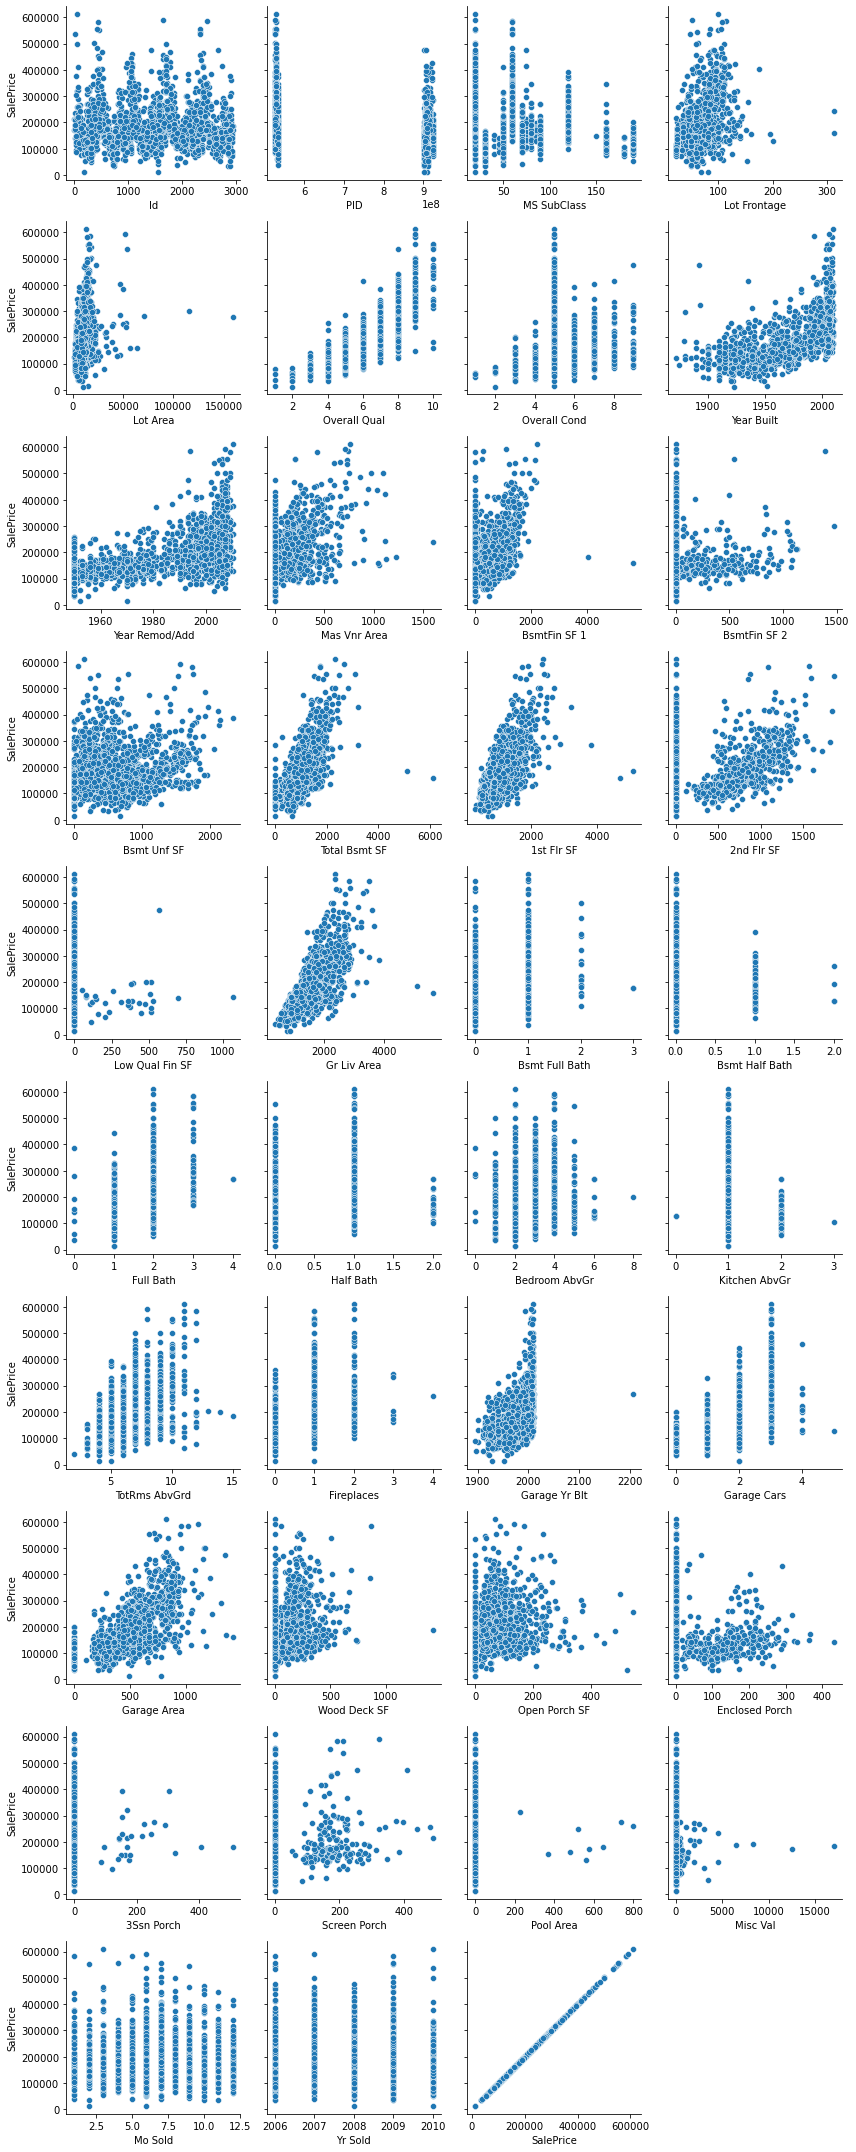

In [16]:
# Generate scatter plots

g = sns.FacetGrid(pd.DataFrame(num_col), col=0, col_wrap=4, sharex=False)
for ax, x_var in zip(g.axes, num_col):
    sns.scatterplot(data=train, x=x_var, y='SalePrice', ax=ax)
g.tight_layout()

Observations:
1. Some features that are not relevant or does not show correlation can be removed, e.g. PID, Month Sold. 
2. There are features with many zero values and may not be useful or influence our analysis, e.g. Screen Porch, Pool Area.
3. New features can also be engineered and added, e.g. making use of Yr Sold and Year Built to determine age of the property. 
4. Outliers will be removed, e.g. Lot Area more than 100,000 m2, Wood Deck SF more than 1000 m2.
5. There is an outlier for Garage Yr Blt beyond year 2200, which we can consider to amend or remove. 


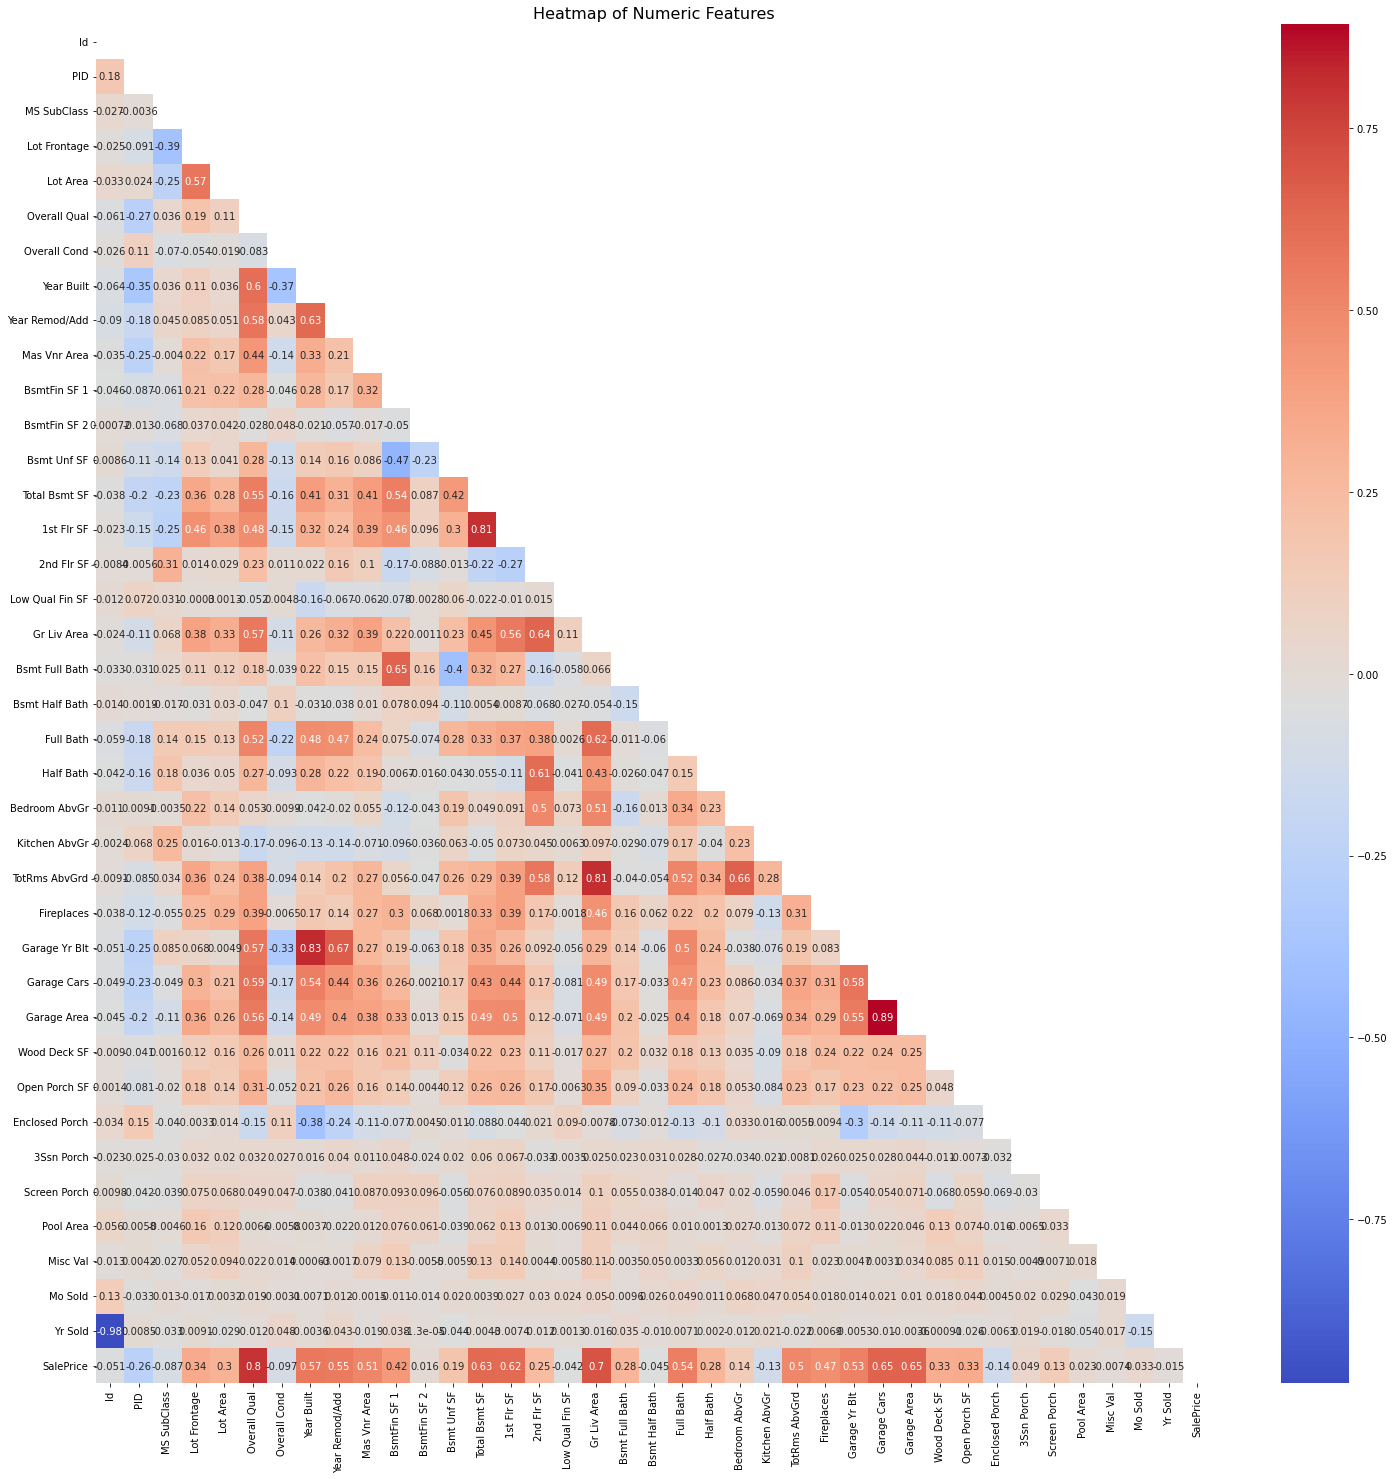

In [17]:
# Plotting a heatmap to visually examine the correlation of numeric features 

plt.figure(figsize=(25,25))

mask = np.zeros_like(train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), mask=mask, annot=True, cmap='coolwarm')

plt.title('Heatmap of Numeric Features', fontsize = 16);

We observe features such as Overall Qual and Gr Liv Area have a high correlation with SalePrice. This is possible as high quality material finish of the property can portray a better image to prospective buyers and hence command a higher price. Properties with larger areas will also cost more than smaller units, given the same price per square feet. 

We will also remove features with high multicollinearity (coefficient > 0.8) as it can affect the variance of the model:
1. Garage Yr Blt and Year Built - high correlation as the garage is likely to be built at the same time with the house<br>
2. TotRms AbvGrd and Gr LivArea - the number of rooms would increase with a larger living area<br>
3. 1st Flr SF and Total Bsmnt SF - high correlation as the area of basement is likely to be similar with the above level<br>
4. Garage Area and Garage Cars - a larger garage would be able to fit more cars

#### Dropping of numeric features

In [18]:
removed_num_features = ['Id', 'PID', 'Mo Sold', 'MS SubClass', 'BsmtFin SF 2', 'Bsmt Unf SF',
            'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
            'Half Bath', 'Kitchen AbvGr', '3Ssn Porch',
            'Screen Porch', 'Pool Area', 'Misc Val',
            'Garage Yr Blt', 'TotRms AbvGrd', '1st Flr SF', 'Garage Area']

In [19]:
drop_features(train, removed_num_features)

#### Removing outliers

In [20]:
train.drop(train.loc[train['Lot Frontage'] > 300].index, axis = 0, inplace = True)
train.drop(train.loc[train['Lot Area'] > 100000].index, axis = 0, inplace = True)
train.drop(train.loc[train['Mas Vnr Area'] > 1500].index, axis = 0, inplace = True)
train.drop(train.loc[train['BsmtFin SF 1'] > 3500].index, axis = 0, inplace = True)
train.drop(train.loc[train['Gr Liv Area'] > 4000].index, axis = 0, inplace = True)


#### Replacing missing values

In [21]:
# Generate list of numeric features with NaN values:

new_num_col = [col for col in train.columns if (train[col].dtype == 'int64') or (train[col].dtype == 'float64')]
train_num_null = train[new_num_col].isnull().sum()
train_num_null = train_num_null[train_num_null > 0]
train_num_null

Lot Frontage     328
Mas Vnr Area      22
BsmtFin SF 1       1
Total Bsmt SF      1
Garage Cars        1
dtype: int64

As Lot Frontage has many missing values (16% of total train set), we will replace the missing values with its mean value.<br>
We will replace the other features with 0, as they consist of very small quantities.

In [22]:
num_null_list = ['Lot Frontage',
                 'Mas Vnr Area',
                 'BsmtFin SF 1',
                 'Total Bsmt SF',
                 'Garage Cars'
                 ]

In [23]:
# Create function to replace NaN values in numeric columns with its mean or 0

def replace_num_col(df, num_null_list):
    for col in num_null_list:
        if col == 'Lot Frontage':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(0)
    

In [24]:
replace_num_col(train, num_null_list)

In [25]:
# Check that missing values are imputed

train[new_num_col].isnull().sum()

Lot Frontage      0
Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
2nd Flr SF        0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
Yr Sold           0
SalePrice         0
dtype: int64

#### Creating new features for Age

In [26]:
# Create function to create Property Age, Years Since Remod and drop Yr Sold, Year Built, Year Remod/Add

def age_creation(df):
        df['Property Age'] = df['Yr Sold'] - df['Year Built']
        df['Yrs Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
        df.drop(['Yr Sold', 'Year Built', 'Year Remod/Add'], axis=1, inplace=True)

In [27]:
age_creation(train)

In [28]:
# Check for new features created 'Property Age' and 'Yrs Since Remod'

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS Zoning        2045 non-null   object 
 1   Lot Frontage     2045 non-null   float64
 2   Lot Area         2045 non-null   int64  
 3   Street           2045 non-null   object 
 4   Lot Shape        2045 non-null   object 
 5   Land Contour     2045 non-null   object 
 6   Utilities        2045 non-null   object 
 7   Lot Config       2045 non-null   object 
 8   Land Slope       2045 non-null   object 
 9   Neighborhood     2045 non-null   object 
 10  Condition 1      2045 non-null   object 
 11  Condition 2      2045 non-null   object 
 12  Bldg Type        2045 non-null   object 
 13  House Style      2045 non-null   object 
 14  Overall Qual     2045 non-null   int64  
 15  Overall Cond     2045 non-null   int64  
 16  Roof Style       2045 non-null   object 
 17  Roof Matl     

## Data Cleaning - Categorical Features

In [29]:
# Generate list of categorical column headers:

cat_col = [col for col in train.columns if (train[col].dtype == 'object')]
len(cat_col)

37

#### Box Plot and Bar Plot

We will create box plots of categorical features against SalePrice to identify possible trends. Bar plots of individual features will be created to assess their distribution against the dataset. 

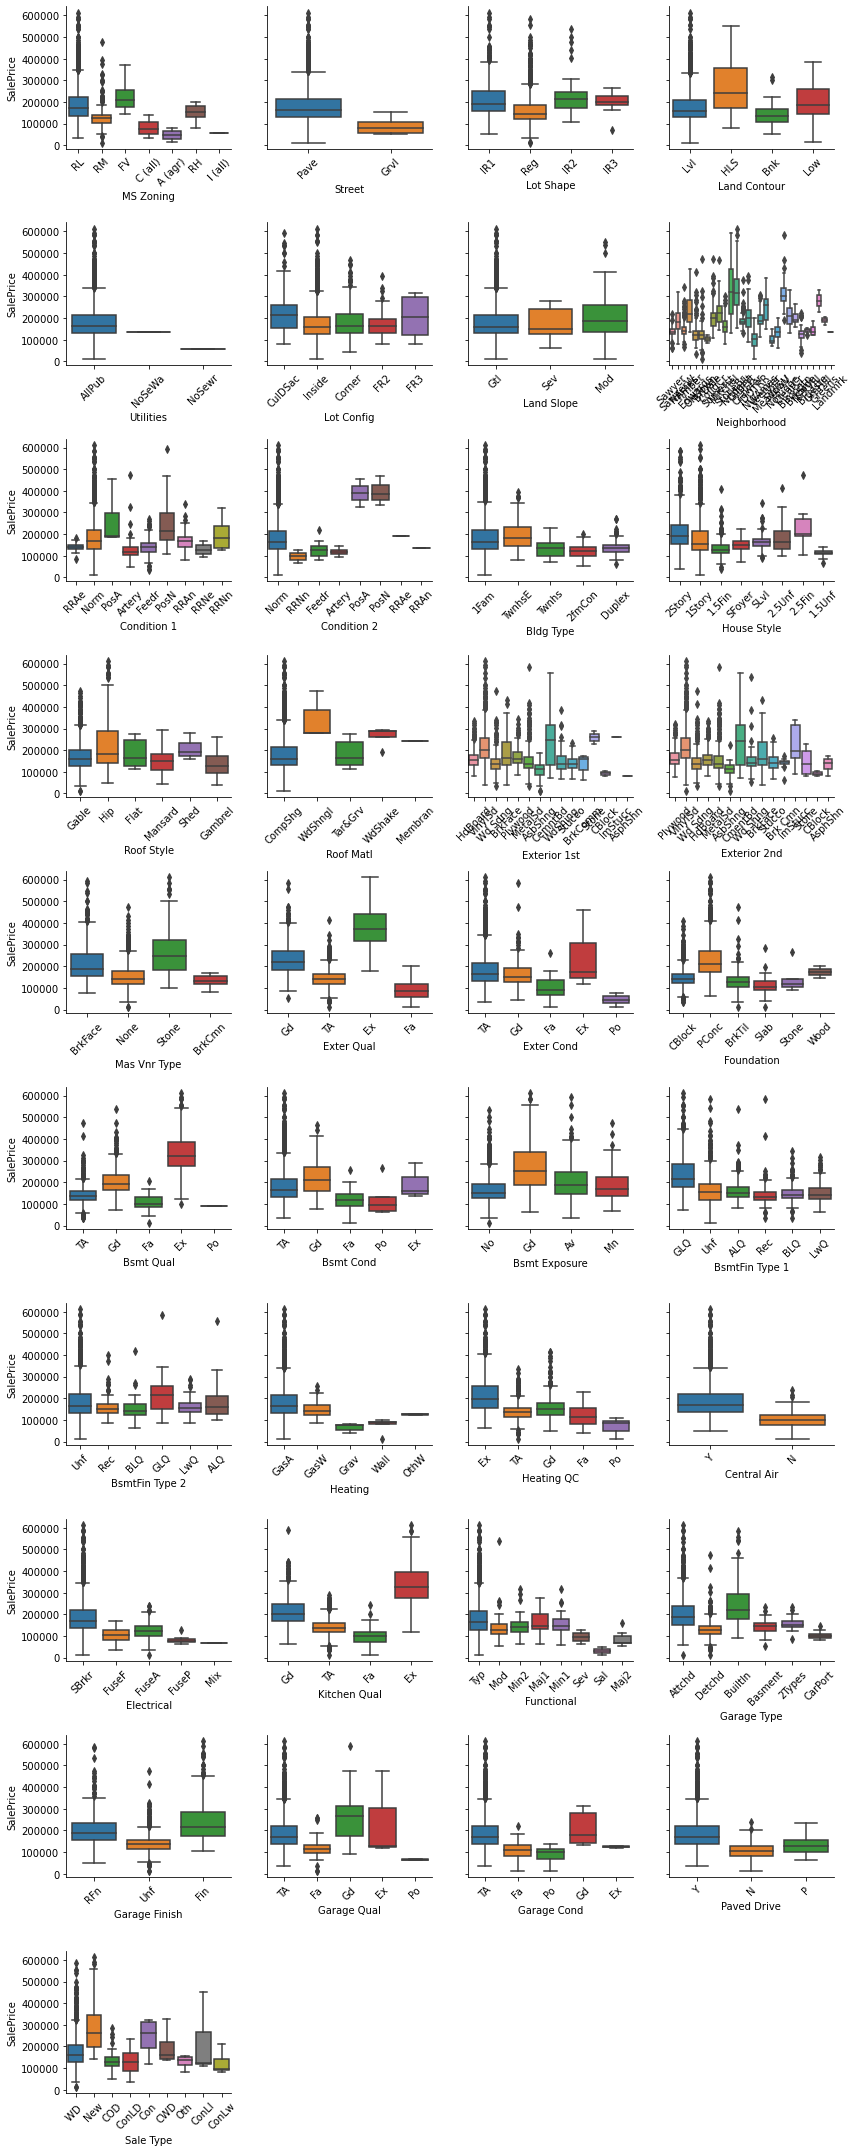

In [30]:
# Generate box plots

g = sns.FacetGrid(pd.DataFrame(cat_col), col=0, col_wrap=4, sharex=False)

for ax, x_var in zip(g.axes, cat_col):
        sns.boxplot(data=train, x=x_var, y='SalePrice', ax=ax)
        plt.setp(ax.get_xticklabels(), rotation=45)
        
g.tight_layout()

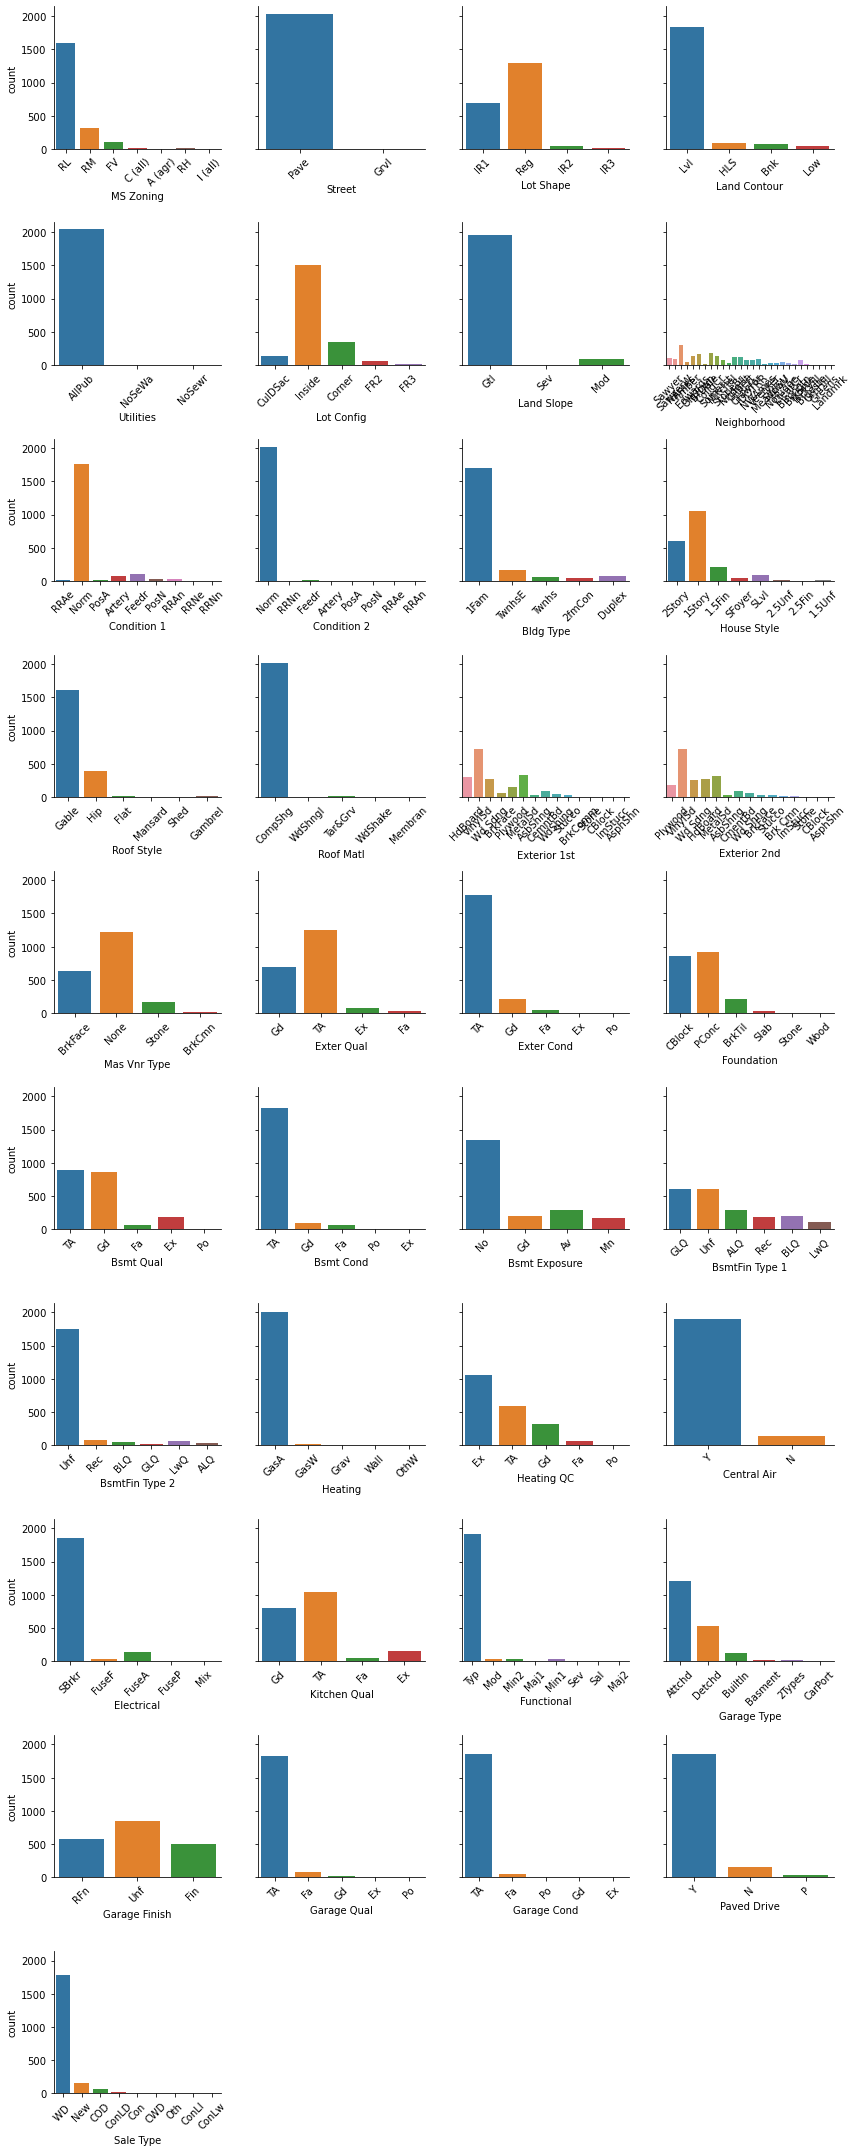

In [31]:
# Generate bar plot

g = sns.FacetGrid(pd.DataFrame(cat_col), col=0, col_wrap=4, sharex=False)
for ax, x_var in zip(g.axes, cat_col):
    sns.countplot(data=train, x=x_var, ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45)
    
g.tight_layout()

Observation:<br>

1. Features such as Neighborhood and Exterior have high categories and varied SalePrice. These features would impact the sales price.
2. Features with skewed distribution can be dropped as the majority of counts belongs to 1 category, e.g. Garage Qual, Electrical.
3. We can filter the zone classification to Residential types only.

In [32]:
# variables to drop
# MS Zoning - we will focus on Residential zones only
# create function

def drop_zone(df):
    df.drop(df[(df['MS Zoning'] == 'A (agr)') |
                 (df['MS Zoning'] == 'C (all)') | 
                 (df['MS Zoning'] == 'I (all)')
                ].index, axis = 0, inplace = True)


In [33]:
drop_zone(train)

In [34]:
# use drop_features function to drop categorical features

cat_remove_list = ['Street', 'Lot Shape', 'Land Contour', 'Utilities',
                   'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2',
                   'Bldg Type', 'Roof Style', 'Roof Matl','Exter Cond',
                   'Foundation', 'Exterior 2nd', 'Bsmt Cond',
                   'Bsmt Exposure', 'BsmtFin Type 2',
                   'Heating', 'Central Air', 'Electrical', 'Functional',
                   'Garage Finish', 'Garage Qual', 'Garage Cond',
                   'Paved Drive', 'Sale Type']

In [35]:
drop_features(train, cat_remove_list)

#### Replacing missing values

In [36]:
new_cat_col = [col for col in train.columns if (train[col].dtype == 'object')]
train_cat_null = train[new_cat_col].isnull().sum()
train_cat_null = train_cat_null[train_cat_null > 0]
train_cat_null

Mas Vnr Type       22
Bsmt Qual          51
BsmtFin Type 1     51
Garage Type       105
dtype: int64

According to the documentation, these values are listed as NA as there are no such features. E.g. NA for Garage Type means no garage. We will replace these values with 'None'.

In [37]:
cat_col_list = train_cat_null.index
print(cat_col_list)

Index(['Mas Vnr Type', 'Bsmt Qual', 'BsmtFin Type 1', 'Garage Type'], dtype='object')


In [38]:
cat_null_list = ['Bsmt Qual', 'BsmtFin Type 1', 'Garage Type']

In [39]:
# create function to replace NaN in categorical columns with 'None'

def replace_cat_col(df, cat_null_list):
    for col in cat_null_list:
        df[col] = df[col].fillna('NA')
    

In [40]:
replace_cat_col(train, cat_null_list)

#### Mapping

In [41]:
# Re-map of ordinal variables

In [42]:
train['Exter Qual'] = train['Exter Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [43]:
train['Bsmt Qual'] = train['Bsmt Qual'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [44]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 
                                                         'BLQ': 4,'ALQ': 5, 'GLQ': 6})

In [45]:
train['Heating QC'] = train['Heating QC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [46]:
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [47]:
# checking dataset:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2050
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS Zoning        2023 non-null   object 
 1   Lot Frontage     2023 non-null   float64
 2   Lot Area         2023 non-null   int64  
 3   Neighborhood     2023 non-null   object 
 4   House Style      2023 non-null   object 
 5   Overall Qual     2023 non-null   int64  
 6   Overall Cond     2023 non-null   int64  
 7   Exterior 1st     2023 non-null   object 
 8   Mas Vnr Type     2001 non-null   object 
 9   Mas Vnr Area     2023 non-null   float64
 10  Exter Qual       2023 non-null   int64  
 11  Bsmt Qual        2023 non-null   int64  
 12  BsmtFin Type 1   2023 non-null   int64  
 13  BsmtFin SF 1     2023 non-null   float64
 14  Total Bsmt SF    2023 non-null   float64
 15  Heating QC       2023 non-null   int64  
 16  2nd Flr SF       2023 non-null   int64  
 17  Gr Liv Area   

<!-- for col in ls_2:
    train[col] = train[col].fillna(train[col].mean()) -->

## Data Cleaning - Test Dataset

In [48]:
# run function to drop features from remove_list
drop_features(test, remove_list)

In [49]:
# drop numeric features
drop_features(test, removed_num_features)

In [50]:
# replace missing numeric values with mean
replace_num_col(test, num_null_list)

In [51]:
# create new Age related columns
age_creation(test)

In [52]:
# drop categorical features
drop_features(test, cat_remove_list)

In [53]:
# replace NaN in categorical columns with 'None'
replace_cat_col(test, cat_null_list)

In [54]:
test['Exter Qual'] = test['Exter Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [55]:
test['Bsmt Qual'] = test['Bsmt Qual'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [56]:
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 
                                                         'BLQ': 4,'ALQ': 5, 'GLQ': 6})

In [57]:
test['Heating QC'] = test['Heating QC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [58]:
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

In [59]:
# check both train and test datasets are cleaned
# 1 less column from test dataset - 'SalePrice'

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2050
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS Zoning        2023 non-null   object 
 1   Lot Frontage     2023 non-null   float64
 2   Lot Area         2023 non-null   int64  
 3   Neighborhood     2023 non-null   object 
 4   House Style      2023 non-null   object 
 5   Overall Qual     2023 non-null   int64  
 6   Overall Cond     2023 non-null   int64  
 7   Exterior 1st     2023 non-null   object 
 8   Mas Vnr Type     2001 non-null   object 
 9   Mas Vnr Area     2023 non-null   float64
 10  Exter Qual       2023 non-null   int64  
 11  Bsmt Qual        2023 non-null   int64  
 12  BsmtFin Type 1   2023 non-null   int64  
 13  BsmtFin SF 1     2023 non-null   float64
 14  Total Bsmt SF    2023 non-null   float64
 15  Heating QC       2023 non-null   int64  
 16  2nd Flr SF       2023 non-null   int64  
 17  Gr Liv Area   

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS Zoning        878 non-null    object 
 1   Lot Frontage     878 non-null    float64
 2   Lot Area         878 non-null    int64  
 3   Neighborhood     878 non-null    object 
 4   House Style      878 non-null    object 
 5   Overall Qual     878 non-null    int64  
 6   Overall Cond     878 non-null    int64  
 7   Exterior 1st     878 non-null    object 
 8   Mas Vnr Type     877 non-null    object 
 9   Mas Vnr Area     878 non-null    float64
 10  Exter Qual       878 non-null    int64  
 11  Bsmt Qual        878 non-null    int64  
 12  BsmtFin Type 1   878 non-null    int64  
 13  BsmtFin SF 1     878 non-null    int64  
 14  Total Bsmt SF    878 non-null    int64  
 15  Heating QC       878 non-null    int64  
 16  2nd Flr SF       878 non-null    int64  
 17  Gr Liv Area     

### One-Hot Encoding

In [62]:
# Set aside SalePrice and drop from train dataset
train_saleprice = train[['SalePrice']]

train.drop(columns='SalePrice', inplace=True)


In [63]:
# Both train and test datasets should have the same columns now.

print(train.shape)
print(test.shape)

(2023, 29)
(878, 29)


We will merge both train and test datasets, perform one-hot encode and split them again to ensure both datasets have the same columns for modelling later on.

In [64]:
merged_df = pd.concat([train, test], axis=0)
merged_df.shape

(2901, 29)

In [65]:
merged_df.columns

Index(['MS Zoning', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'House Style',
       'Overall Qual', 'Overall Cond', 'Exterior 1st', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC', '2nd Flr SF',
       'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen Qual',
       'Fireplaces', 'Garage Type', 'Garage Cars', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', 'Property Age', 'Yrs Since Remod'],
      dtype='object')

In [66]:
# one hot encoding for categorical columns

merged_df = pd.get_dummies(merged_df, drop_first=True)

In [67]:
merged_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,2nd Flr SF,Gr Liv Area,Full Bath,Bedroom AbvGr,Kitchen Qual,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,Property Age,Yrs Since Remod,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA
0,68.738497,13517,6,8,289.0,3,3,6,533.0,725.0,4,754,1479,2,3,3,0,2.0,0,44,0,34,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,43.000000,11492,7,5,132.0,3,4,6,637.0,913.0,4,1209,2122,2,4,3,1,2.0,0,74,0,13,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,68.000000,7922,5,7,0.0,2,3,6,731.0,1057.0,2,0,1057,1,3,3,0,1.0,0,52,0,57,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,73.000000,9802,5,5,0.0,2,4,1,0.0,384.0,3,700,1444,2,3,2,0,2.0,100,0,0,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,82.000000,14235,6,8,0.0,2,2,1,0.0,676.0,2,614,1445,2,3,2,0,2.0,0,59,0,110,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,80.000000,8000,6,6,0.0,2,3,5,931.0,1084.0,2,793,1877,2,4,2,1,2.0,0,96,0,33,33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
874,90.000000,14670,6,7,410.0,3,3,4,575.0,1104.0,4,884,1988,2,4,3,1,2.0,0,230,0,42,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
875,55.000000,8250,5,5,0.0,2,3,4,250.0,952.0,4,0,1211,1,3,2,1,1.0,0,63,0,40,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
876,60.000000,9000,4,6,0.0,2,3,5,616.0,864.0,2,0,864,1,3,2,0,2.0,0,0,0,36,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [68]:
# Split to train set
train_clean = merged_df.iloc[:2023, :]
train_clean.shape

(2023, 87)

In [69]:
# Add back SalePrice
train_clean = pd.merge(train_clean, train_saleprice, how='inner', left_index=True, right_index=True)

In [70]:
train_clean.shape

(2023, 88)

In [71]:
# Split to test set
test_clean = merged_df.iloc[2023:, :]
test_clean.shape

(878, 87)

## Export Clean Datasets

In [72]:
# # Save as csv format
train_clean.to_csv("../datasets/train_clean.csv", index=False)
test_clean.to_csv("../datasets/test_clean.csv", index=False)
